In [1]:
import cv2 as cv
import os
import paddle


class GOALS2022Dataset(paddle.io.Dataset):
    def __init__(self, mode):
        self.mode = mode
        if mode == "Train":
            self.lbound = 1
            self.rbound = 100
        elif mode == "Validation":
            self.lbound = 101
            self.rbound = 200

    def __getitem__(self, i):
        if os.path.exists(
            f"data/data175394/GOALS2022/{self.mode}/GC_Label_0/{i + self.lbound:0>4}.png"
        ):
            img = cv.imread(
                f"data/data175394/GOALS2022/{self.mode}/GC_Label_0/{i + self.lbound:0>4}.png"
            )
            img = cv.resize(img, (224, 224))
            # H, W, C => C, H, W
            img = img.transpose((2, 0, 1))
            # numpy => paddle
            img = paddle.to_tensor(img)
            # [0, 255] => [0, 1]
            img = img / 255
            return img, 0
        elif os.path.exists(
            f"data/data175394/GOALS2022/{self.mode}/GC_Label_1/{i + self.lbound:0>4}.png"
        ):
            img = cv.imread(
                f"data/data175394/GOALS2022/{self.mode}/GC_Label_1/{i + self.lbound:0>4}.png"
            )
            img = cv.resize(img, (224, 224))
            # H, W, C => C, H, W
            img = img.transpose((2, 0, 1))
            # numpy => paddle
            img = paddle.to_tensor(img)
            # [0, 255] => [0, 1]
            img = img / 255
            return img, 1
        else:
            raise FileNotFoundError

    def __len__(self):
        return self.rbound - self.lbound + 1


train_data = GOALS2022Dataset("Train")
eval_data = GOALS2022Dataset("Validation")
model = paddle.Model(paddle.vision.models.resnet18(num_classes=2))
'''
model.prepare(
    optimizer=paddle.optimizer.Adam(learning_rate=0.001, parameters=model.parameters()),
    loss=paddle.nn.CrossEntropyLoss(),
    metrics=paddle.metric.Accuracy(),
)
model.fit(train_data, batch_size=32, epochs=100, verbose=1)
model.evaluate(eval_data)
'''
model.load('resnet18')
#model.summary()

W1110 17:06:04.362879 14359 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 11.2
W1110 17:06:04.366320 14359 gpu_resources.cc:91] device: 0, cuDNN Version: 8.2.


In [2]:
%pip install interpretdl

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 926.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 1.0 MB/s eta 0:00:0000:01m00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 590.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 kB 50.6 kB/s eta 0:00:00a 0:00:02
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
for i in model.network.named_sublayers():
    print(i)

('conv1', Conv2D(3, 64, kernel_size=[7, 7], stride=[2, 2], padding=3, data_format=NCHW))
('bn1', BatchNorm2D(num_features=64, momentum=0.9, epsilon=1e-05))
('relu', ReLU())
('maxpool', MaxPool2D(kernel_size=3, stride=2, padding=1))
('layer1', Sequential(
  (0): BasicBlock(
    (conv1): Conv2D(64, 64, kernel_size=[3, 3], padding=1, data_format=NCHW)
    (bn1): BatchNorm2D(num_features=64, momentum=0.9, epsilon=1e-05)
    (relu): ReLU()
    (conv2): Conv2D(64, 64, kernel_size=[3, 3], padding=1, data_format=NCHW)
    (bn2): BatchNorm2D(num_features=64, momentum=0.9, epsilon=1e-05)
  )
  (1): BasicBlock(
    (conv1): Conv2D(64, 64, kernel_size=[3, 3], padding=1, data_format=NCHW)
    (bn1): BatchNorm2D(num_features=64, momentum=0.9, epsilon=1e-05)
    (relu): ReLU()
    (conv2): Conv2D(64, 64, kernel_size=[3, 3], padding=1, data_format=NCHW)
    (bn2): BatchNorm2D(num_features=64, momentum=0.9, epsilon=1e-05)
  )
))
('layer1.0', BasicBlock(
  (conv1): Conv2D(64, 64, kernel_size=[3, 3], pad

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/interpretdl/interpreter/abc_interpreter.py:294: UserWarning: ``use_cuda`` would be deprecate

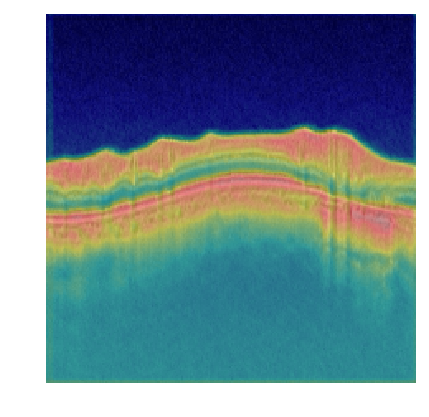

100%|██████████| 64/64 [00:00<00:00, 85.61it/s]


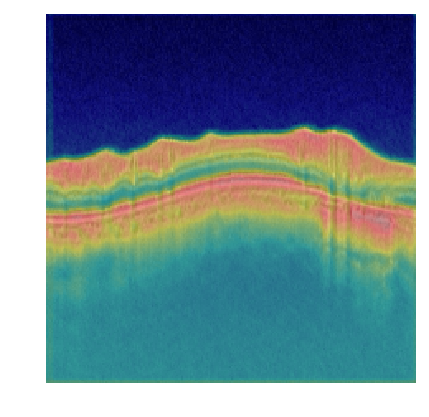

100%|██████████| 64/64 [00:00<00:00, 89.54it/s]


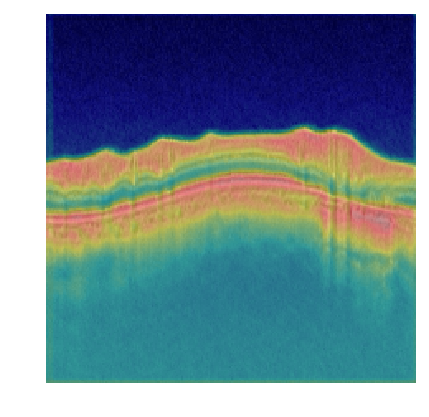

100%|██████████| 64/64 [00:00<00:00, 90.43it/s]


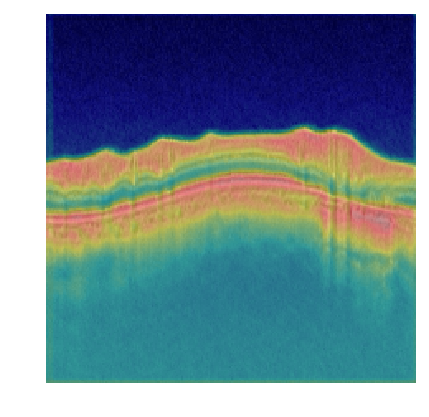

100%|██████████| 64/64 [00:00<00:00, 90.45it/s]


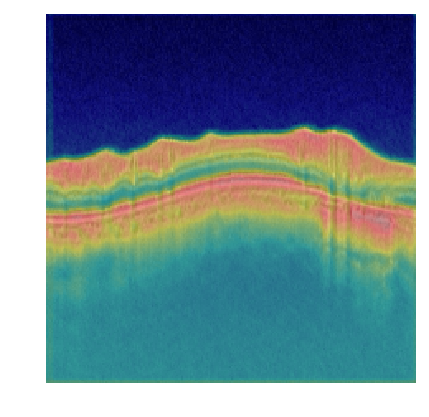

100%|██████████| 64/64 [00:00<00:00, 89.37it/s]


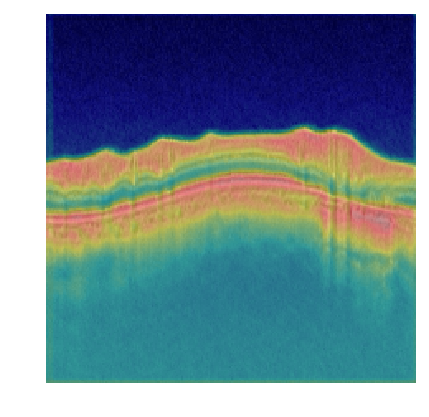

100%|██████████| 64/64 [00:00<00:00, 89.10it/s]


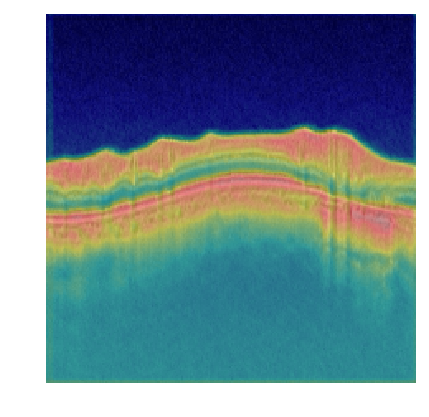

100%|██████████| 64/64 [00:00<00:00, 88.79it/s]


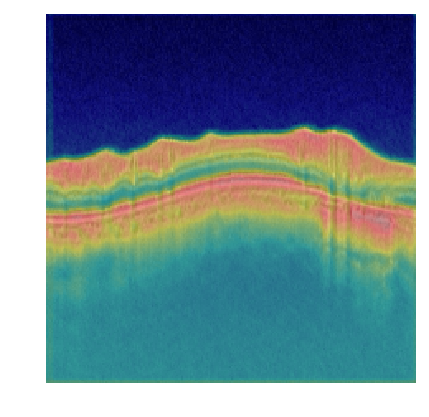

100%|██████████| 64/64 [00:00<00:00, 90.00it/s]


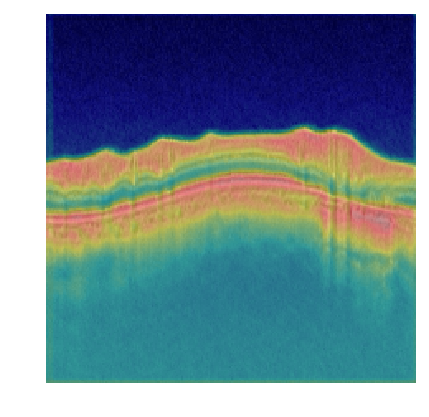

100%|██████████| 64/64 [00:00<00:00, 87.42it/s]


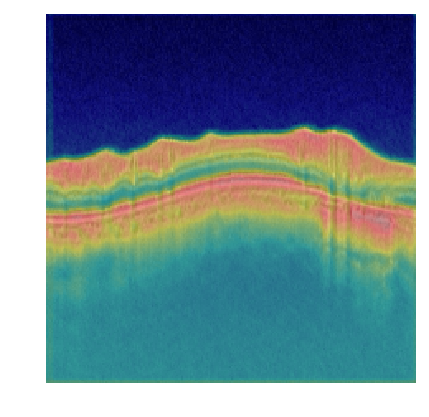

100%|██████████| 64/64 [00:00<00:00, 88.07it/s]


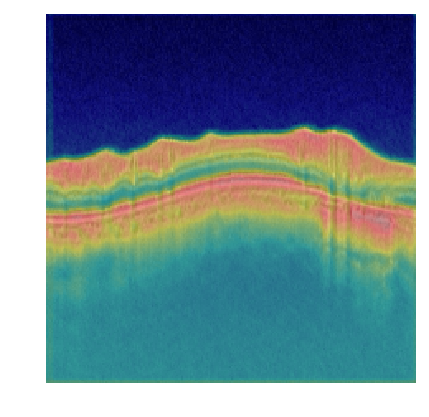

100%|██████████| 64/64 [00:00<00:00, 89.63it/s]


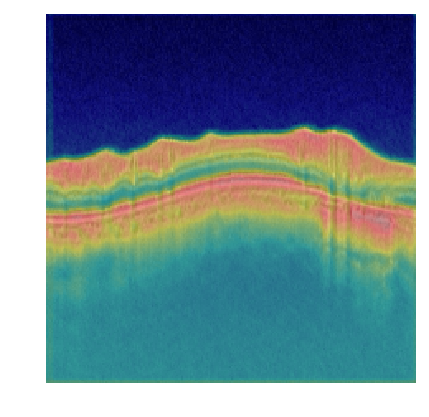

100%|██████████| 64/64 [00:00<00:00, 88.13it/s]


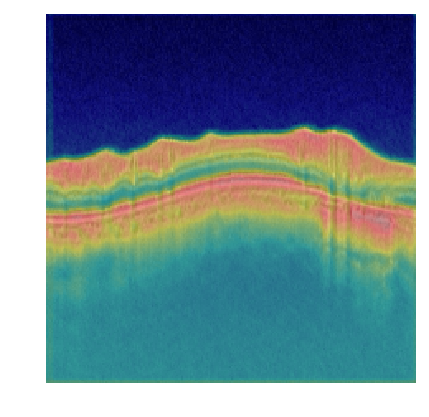

100%|██████████| 64/64 [00:00<00:00, 89.26it/s]


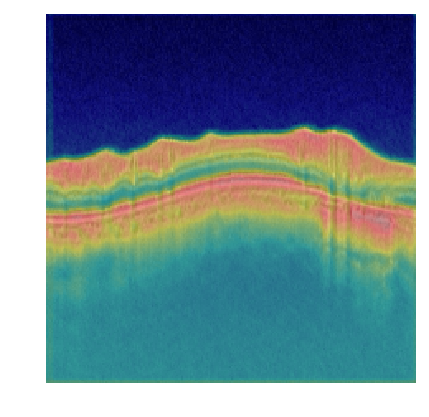

100%|██████████| 64/64 [00:00<00:00, 89.92it/s]


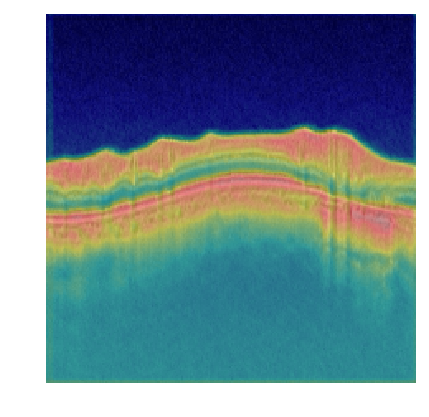

100%|██████████| 64/64 [00:00<00:00, 89.31it/s]


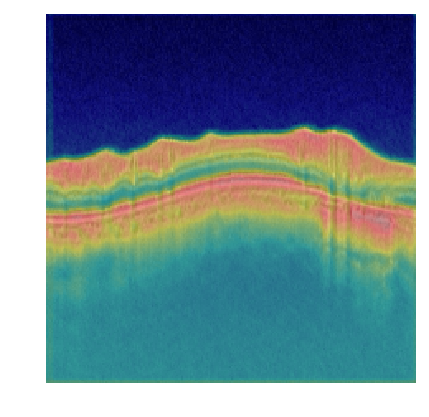

100%|██████████| 64/64 [00:00<00:00, 88.32it/s]


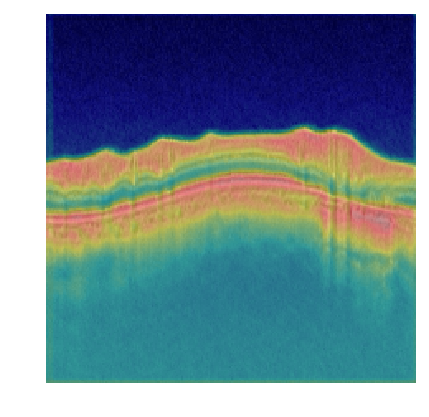

100%|██████████| 64/64 [00:00<00:00, 87.39it/s]


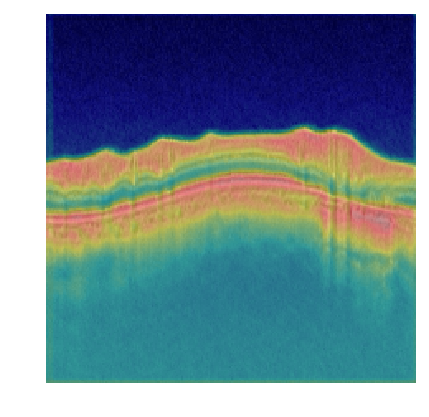

100%|██████████| 64/64 [00:00<00:00, 89.40it/s]


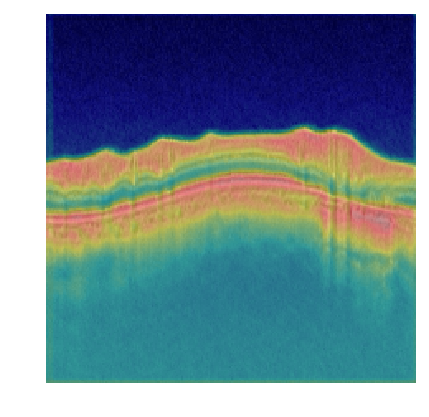

100%|██████████| 64/64 [00:00<00:00, 89.53it/s]


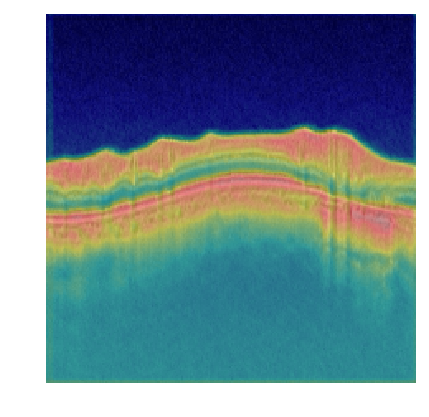

100%|██████████| 64/64 [00:00<00:00, 89.56it/s]


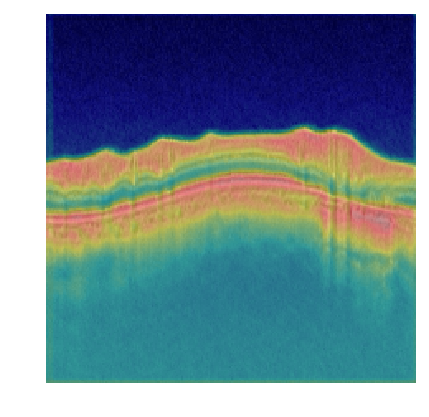

100%|██████████| 64/64 [00:00<00:00, 89.49it/s]


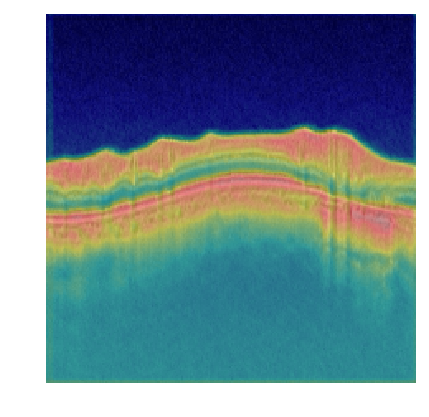

100%|██████████| 64/64 [00:00<00:00, 89.24it/s]


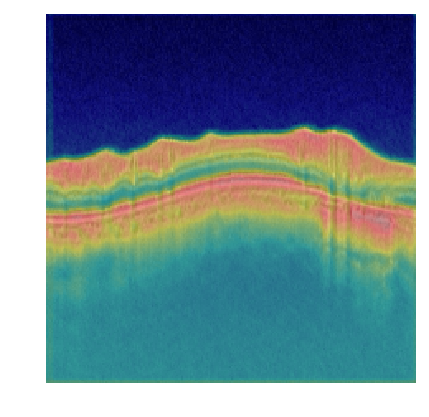

100%|██████████| 64/64 [00:00<00:00, 89.38it/s]


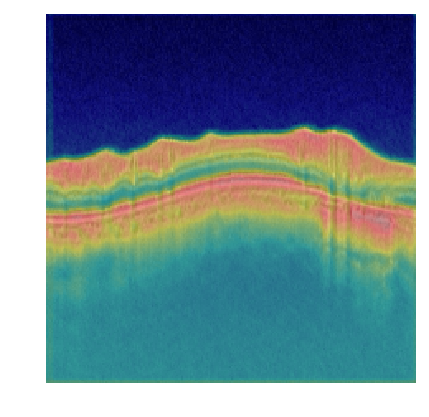

100%|██████████| 64/64 [00:00<00:00, 89.72it/s]


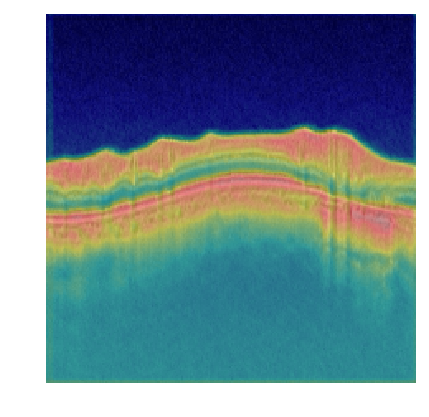

100%|██████████| 64/64 [00:00<00:00, 89.59it/s]


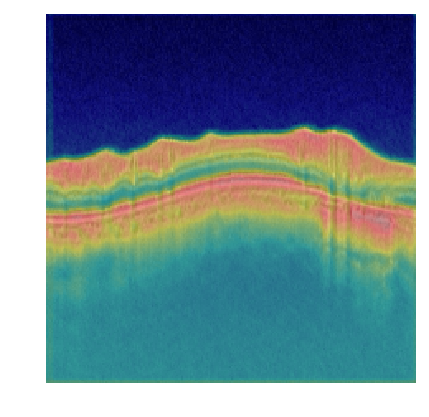

100%|██████████| 64/64 [00:00<00:00, 90.28it/s]


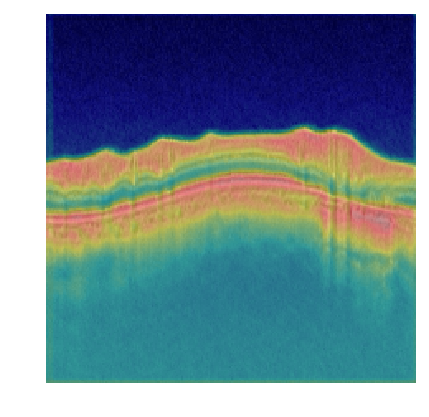

100%|██████████| 64/64 [00:00<00:00, 90.32it/s]


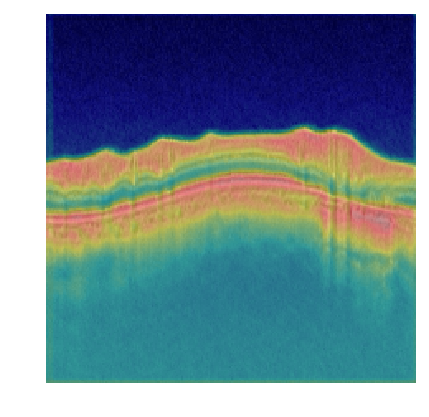

100%|██████████| 64/64 [00:00<00:00, 90.25it/s]


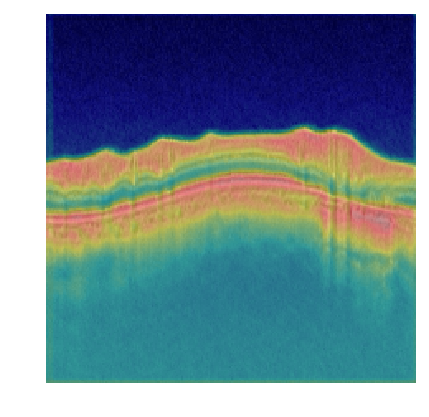

100%|██████████| 64/64 [00:00<00:00, 90.21it/s]


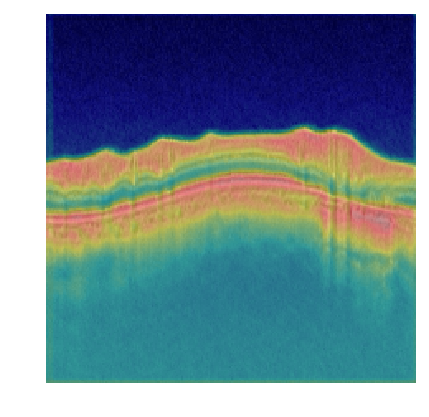

100%|██████████| 64/64 [00:00<00:00, 89.66it/s]


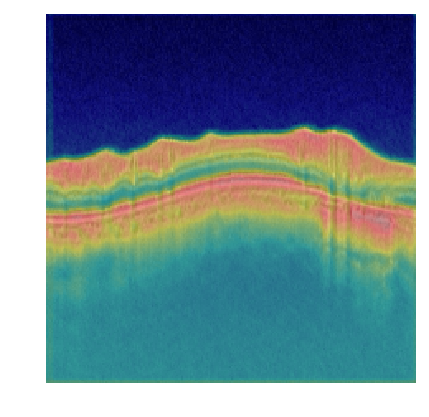

100%|██████████| 64/64 [00:00<00:00, 90.32it/s]


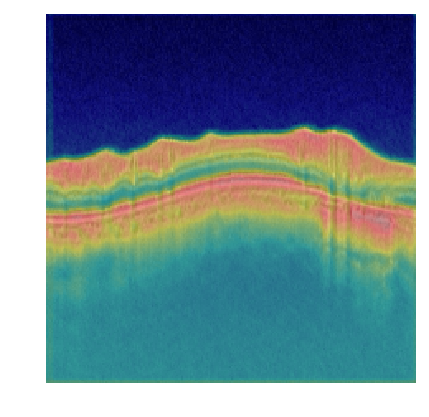

100%|██████████| 64/64 [00:00<00:00, 89.97it/s]


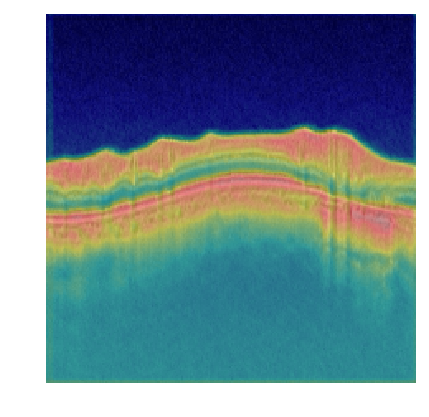

100%|██████████| 64/64 [00:00<00:00, 90.03it/s]


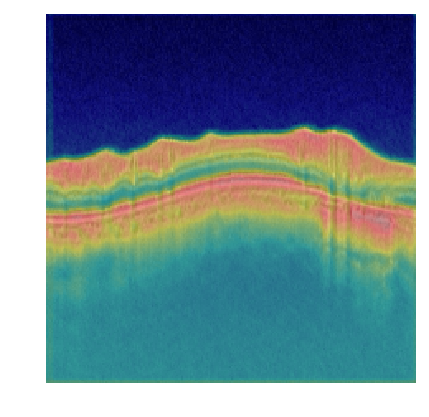

100%|██████████| 64/64 [00:00<00:00, 86.98it/s]


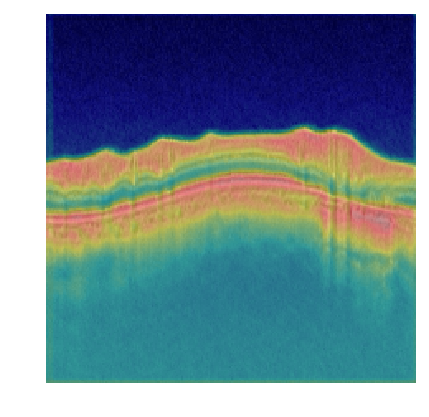

100%|██████████| 64/64 [00:00<00:00, 85.97it/s]


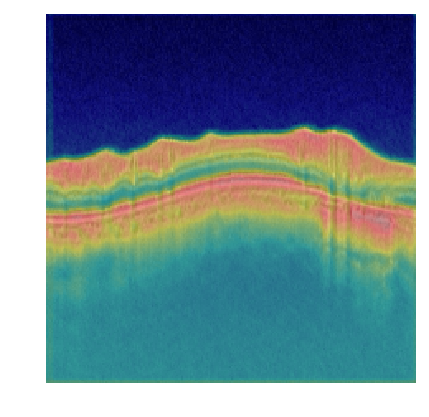

100%|██████████| 64/64 [00:00<00:00, 75.04it/s]


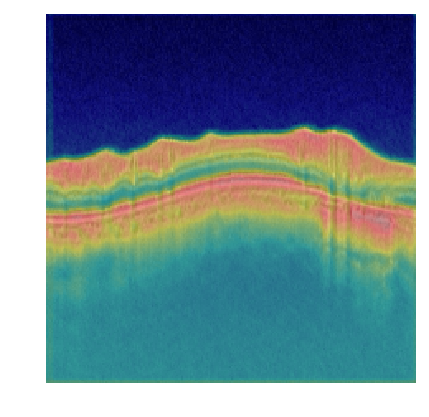

100%|██████████| 64/64 [00:00<00:00, 77.04it/s]


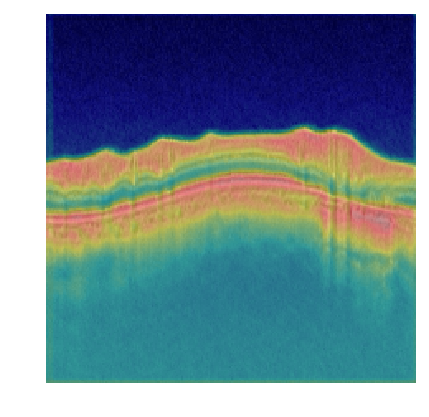

100%|██████████| 64/64 [00:00<00:00, 76.36it/s]


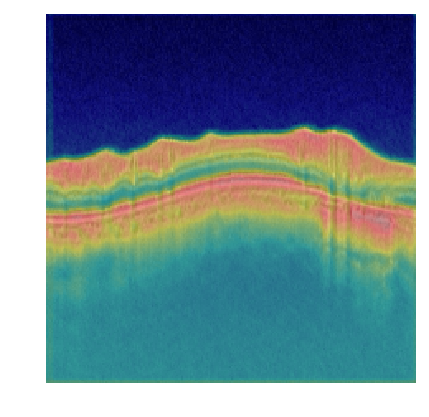

100%|██████████| 64/64 [00:00<00:00, 89.58it/s]


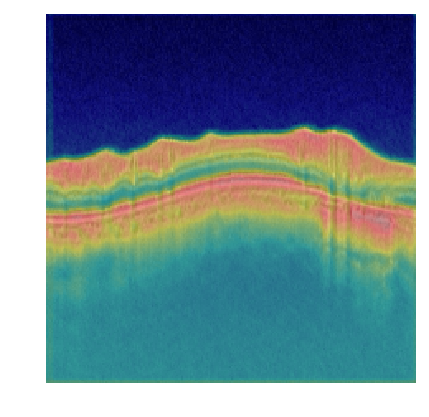

100%|██████████| 64/64 [00:00<00:00, 88.81it/s]


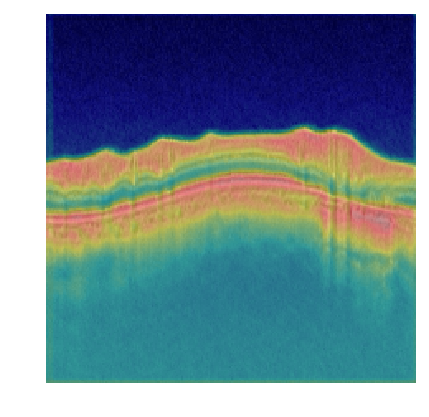

100%|██████████| 64/64 [00:00<00:00, 89.58it/s]


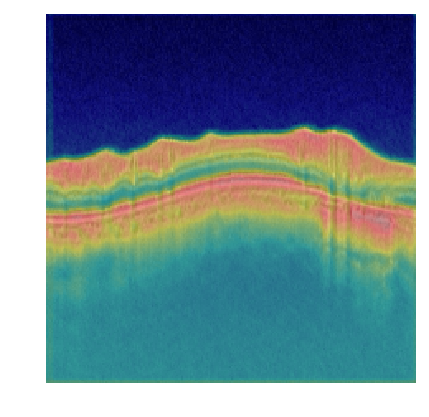

100%|██████████| 64/64 [00:00<00:00, 88.10it/s]


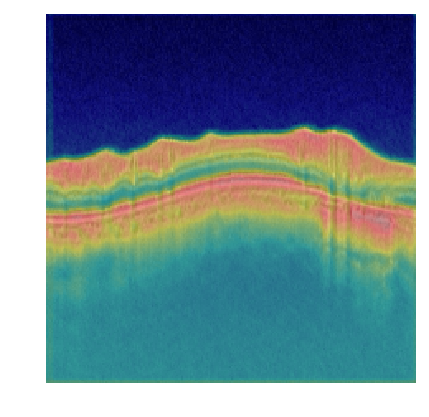

100%|██████████| 64/64 [00:00<00:00, 86.42it/s]


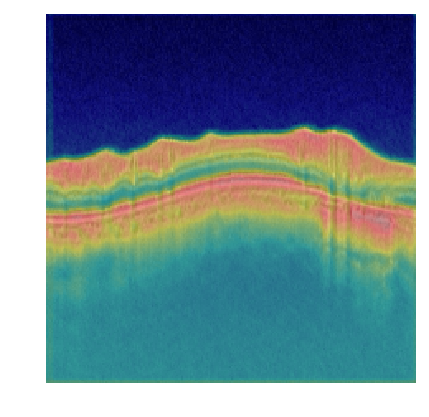

100%|██████████| 64/64 [00:00<00:00, 88.72it/s]


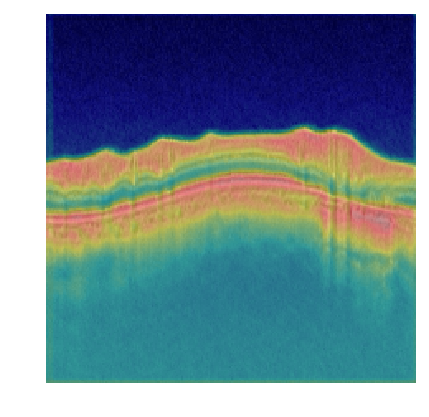

100%|██████████| 64/64 [00:00<00:00, 89.20it/s]


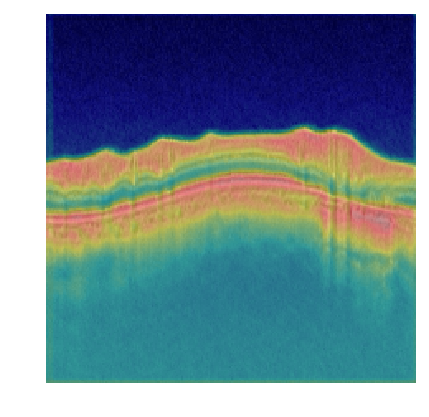

100%|██████████| 64/64 [00:00<00:00, 88.63it/s]


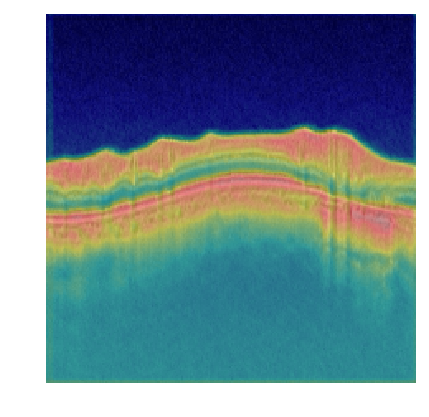

100%|██████████| 64/64 [00:00<00:00, 88.75it/s]


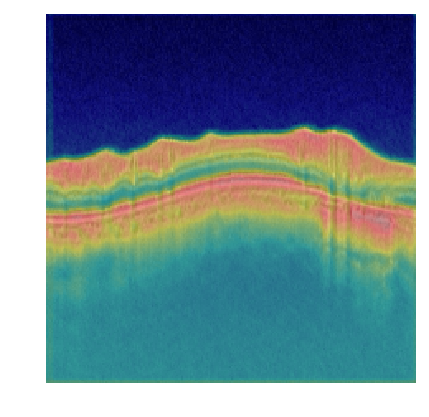

100%|██████████| 64/64 [00:00<00:00, 88.39it/s]


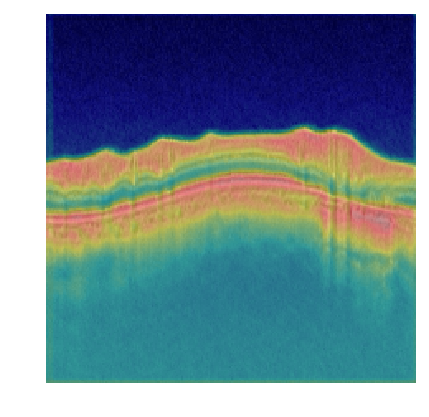

100%|██████████| 64/64 [00:00<00:00, 89.17it/s]


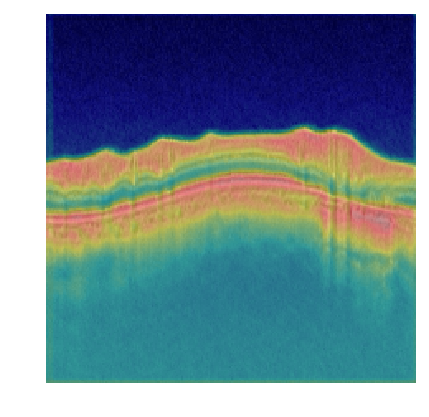

100%|██████████| 64/64 [00:00<00:00, 88.85it/s]


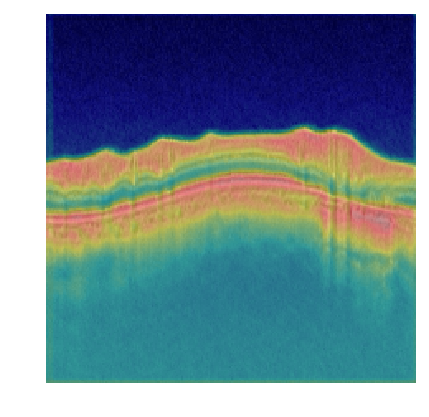

100%|██████████| 64/64 [00:00<00:00, 87.65it/s]


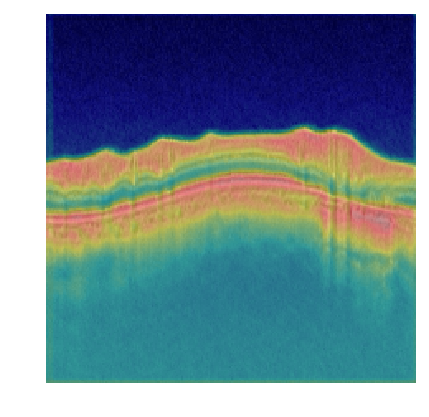

100%|██████████| 64/64 [00:00<00:00, 87.90it/s]


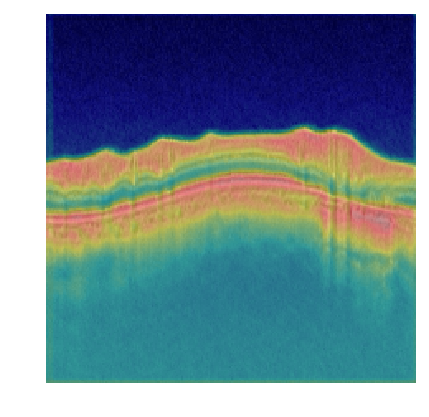

100%|██████████| 64/64 [00:00<00:00, 89.33it/s]


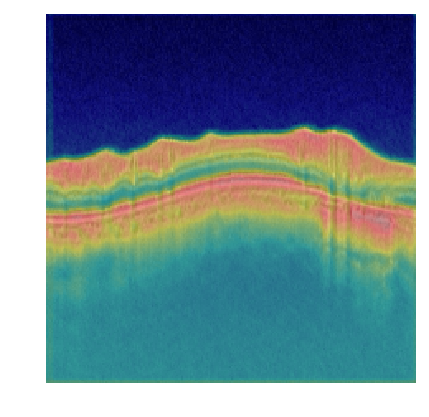

100%|██████████| 64/64 [00:00<00:00, 89.92it/s]


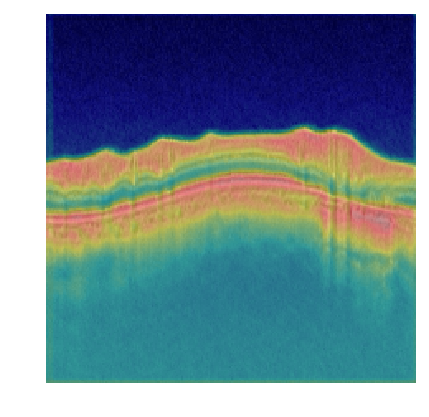

100%|██████████| 64/64 [00:00<00:00, 89.00it/s]


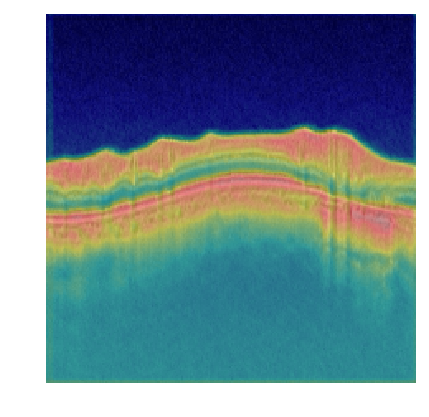

100%|██████████| 64/64 [00:00<00:00, 88.89it/s]


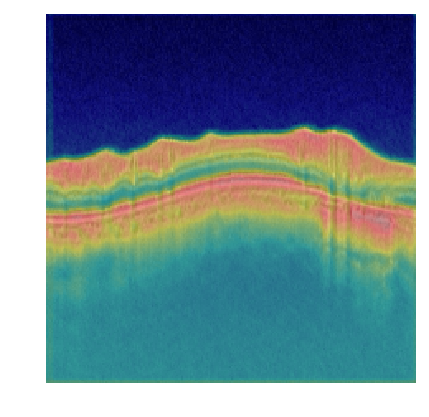

100%|██████████| 64/64 [00:00<00:00, 89.17it/s]


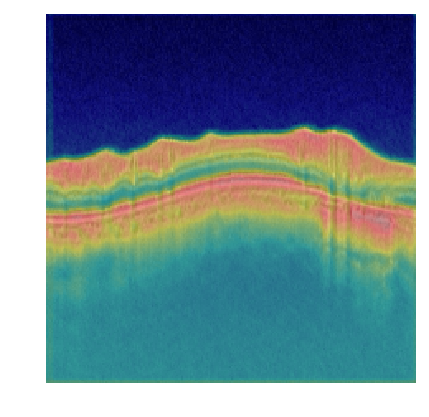

100%|██████████| 64/64 [00:00<00:00, 88.96it/s]


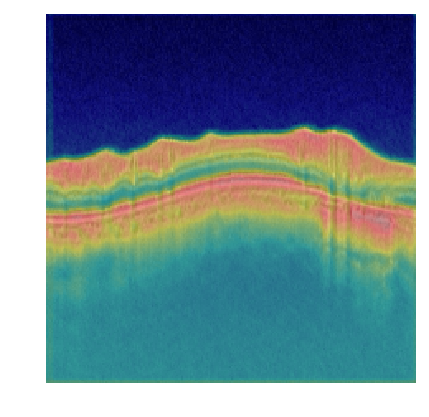

100%|██████████| 64/64 [00:00<00:00, 89.55it/s]


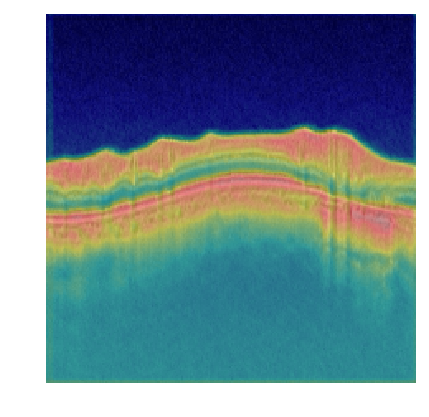

100%|██████████| 64/64 [00:00<00:00, 90.30it/s]


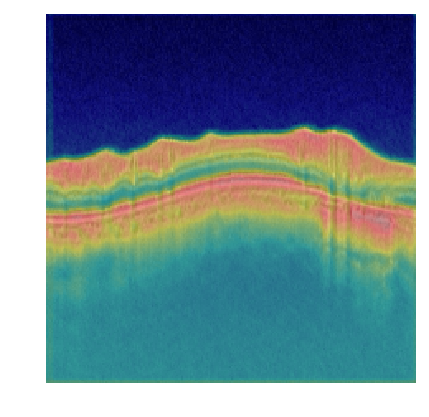

100%|██████████| 64/64 [00:00<00:00, 89.45it/s]


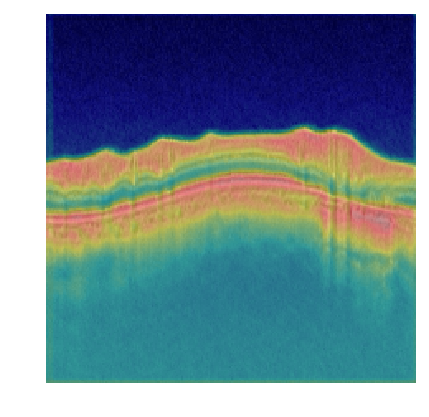

100%|██████████| 64/64 [00:00<00:00, 86.98it/s]


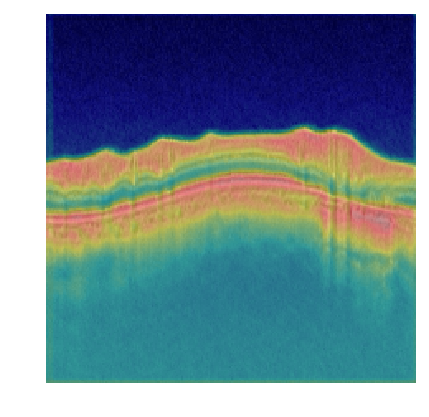

100%|██████████| 64/64 [00:00<00:00, 87.10it/s]


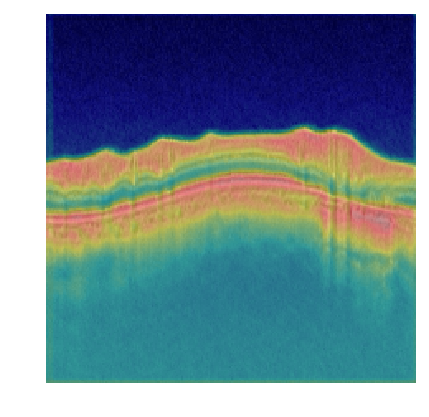

100%|██████████| 64/64 [00:00<00:00, 87.29it/s]


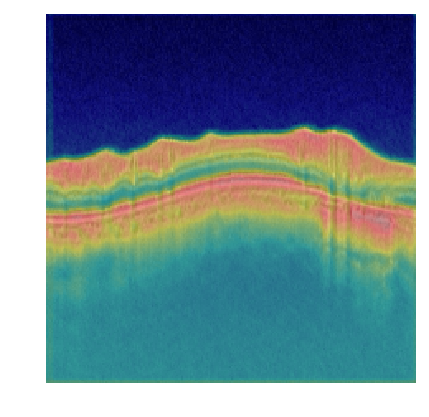

100%|██████████| 64/64 [00:00<00:00, 88.49it/s]


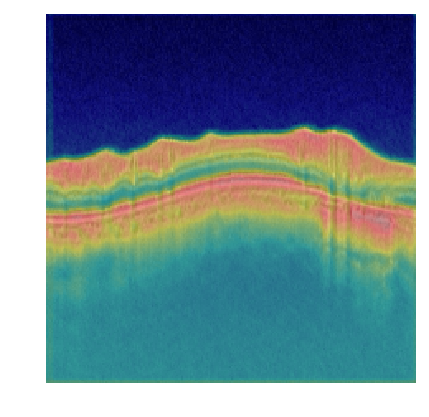

100%|██████████| 64/64 [00:00<00:00, 88.49it/s]


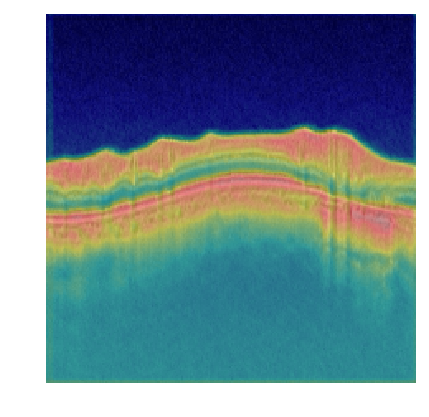

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import interpretdl as it
import cv2 as cv
img = cv.imread('data/data175394/GOALS2022/Validation/GC_Label_0/0107.png')
img = cv.resize(img, (224, 224))
sg = it.ScoreCAMInterpreter(model.network, use_cuda=True)
for n, v in model.network.named_sublayers():
    try:
        sg.interpret(img, target_layer_name=n)
    except:
        print('Except')